# Capstone 2 - Diabetes Patients’ Readmission Prediction

Code written by: Rayees Ahamed 

# Introduction

**Problem statement:** 
What are the factors leading to high readmission of diabetes patients’ to hospital within 30 days of discharge?

**Context:** 
Diabetes is a chronic health disease caused due to excess glucose in the blood and failure of our pancreas to produce insulin properly. This leads to several health complications to patients such as cardiovascular risk, frequent infections, blindness (retinopathy) etc. The data from 130 US hospitals from 1999-2008 shows there is a high percentage of diabetes patients getting readmitted within 30 days of their last discharge. This poses the question what factors are responsible that makes patients’ getting readmitted within a short time. Finding these factors will help in improving the quality of care in diabetes patients’, lowering the medical cost involved and identifying medicines effective in treating diabetes.

**Criteria for success:** 
* Identifying one or more attributes that caused diabetes patients’ getting readmitted
* Understanding the relationship between different attributes
* Key medicines used in treatment that helped patients’ not getting readmitted 

**Scope of solution space:**
Finding the attributes highly correlated in the patients’ who are frequently admitted. Finding the features that correlated in the patients’ who are not frequently admitted. Understanding the epidemiology of different diabetes patients (age, gender, race) that are prevalent to readmission. Medicines that are successfully treated and helped patients’ in avoiding hospital readmission.

**Constraints within solution space:**
Some attributes may lack information in all the patients. Due to the large number of categorical variables, it may be difficult to use those variables in prediction. Available data may not be sufficient to arrive at a conclusion, and may require additional data to make a clinical decision. Final model can only be used for research purposes and should not be used for diagnostic or treatment purposes.

**Stakeholders to provide key insight:**

* Dipanjan Sarkar - Data Scientist & Mentor at Springboard
* Rayees Ahamed B - Springboard Data Science Student

**Key data sources:**
https://www.kaggle.com/saurabhtayal/diabetic-patients-readmission-prediction

Data can be downloaded from the above kaggle page. Data originally deposited in UCI Machine Learning repository. This data derived from the published article named ‘The relationship between diabetes mellitus and 30-day readmission rates’ from Clinical Diabetes and Endocrinology journal.

Dataset Name: Diabetes 130-US hospitals for years 1999-2008 Data Set


# Imports

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [20]:
url = "https://raw.githubusercontent.com/rayees-codes/Springboard-Projects/main/diabetic_data.csv"

d_data = pd.read_csv(url)
d_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Exploring the data

In [21]:
d_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

By examining the columns, we can identify the columns of interest for analysis.

For example:
* Gender
* Age
* Weight
* Time in hospital
* Number of medications
* Number of diagnosis
* Diagnosis tests (Glucose level, Alc test)
* Diabetes medications
* Readmitted or not

**Missing values**

In [22]:
d_data.isna().any()

encounter_id                False
patient_nbr                 False
race                        False
gender                      False
age                         False
weight                      False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                  False
medical_specialty           False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide 

Several columns have wrong datatypes, so missing values are hidden as objects.

For example column weight shows data type as object, which should be int64 or float

In [23]:
# Checking the column names once

d_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

**Checking the weight column**

In [24]:
d_data['weight'].head()

0    ?
1    ?
2    ?
3    ?
4    ?
Name: weight, dtype: object

In [39]:
d_data['weight'].value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [40]:
weight_missing = (98569/101766) * 100
print(weight_missing, "% of values are missing")

96.85847925633315 % of values are missing


If we see 'weight' column, 98569 out of 101766 rows are missing & marked as '?' object, which is 97% of values are missing.
Good reason to drop this column from the analysis.

**Checking the age column**

In [29]:
# Checking age column

d_data['age'].tail()

101761    [70-80)
101762    [80-90)
101763    [70-80)
101764    [80-90)
101765    [70-80)
Name: age, dtype: object

In [41]:
d_data['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

Looks like 'age' column does not have any odd or missing values, but categorized into different age groups. Also the datatype is 'object', which need to be converted into 'category' datatype.

**Checking Gender column**

In [36]:
d_data['gender'].tail()

101761      Male
101762    Female
101763      Male
101764    Female
101765      Male
Name: gender, dtype: object

In [38]:
d_data['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

'Gender' has only 3 missing values & marked as 'Unknown/Invalid'. This need to be either excluded or converted into 'NaN' before analysis. 

# Checking the target variable - 'readmitted'

In [50]:
d_data['readmitted'].tail(10)

101756    >30
101757     NO
101758     NO
101759     NO
101760    >30
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, dtype: object

**Number of patients got readmitted**

In [94]:
d_data.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

**Distribution of 'readmitted' column**

<AxesSubplot:title={'center':'Readmitted'}, xlabel='Count'>

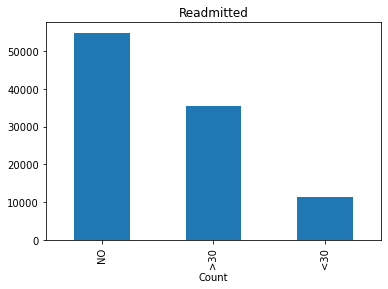

In [75]:
# Looking at the distribution 

d_data.readmitted.value_counts().plot(kind='bar', title='Readmitted', xlabel='Count')

**Percentage of patients got readmitted**

In [95]:
readmitted = d_data['readmitted'].value_counts()
NO = (readmitted['NO'] / readmitted.sum()) * 100
Above_30 = (readmitted['>30'] / readmitted.sum()) * 100
Below_30 = (readmitted['<30'] / readmitted.sum()) * 100

print('Not readmitted:', NO, "%")
print('Readmitted above 30 times:', Above_30, "%")
print('Readmitted below 30 times:', Below_30, "%")

Not readmitted: 53.911915571015854 %
Readmitted above 30 times: 34.92816854352141 %
Readmitted below 30 times: 11.159915885462727 %


Clearly we see three sets of category of people here,
1. People who did not get redmitted ('NO')
2. People who got readmitted less than 30 times ('<30')
3. People who got readmitted more than 30 times ('>30')

From here, we can get some key questions to be asked:
* Why are large group of people did not get readmitted? 
* What factors/attributes helped them to not get readmitted? What medications they taken?
* Why some group of people are more frequent to get redmitted? 
* What attributes contribute to those people who get frequently readmitted?

**Distribution of 'Time in hospital' column:**

The time each patient spent at hospital can give some idea on the severity of the patients

Text(0, 0.5, 'Number of days')

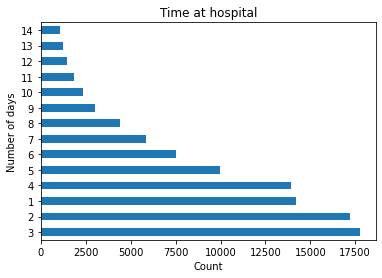

In [111]:
d_data['time_in_hospital'].value_counts().sort_values(ascending=False).plot(kind='barh', title='Time at hospital')
plt.xlabel('Count')
plt.ylabel('Number of days')

In [112]:
d_data.time_in_hospital.describe()

count    101766.000000
mean          4.395987
std           2.985108
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64

Splitting the dataframe into two segments based on the 'time in hospital'. 1. Above 6 days, 2. Below 6 days

In [134]:
above_6 = d_data[d_data['time_in_hospital'] < 6]
below_6 = d_data[d_data['time_in_hospital'] > 6]

print('Above 6 days:', ((above_6.time_in_hospital.count()) / (d_data.time_in_hospital.count()) * 100), '%')
print('Below 6 days:', ((below_6.time_in_hospital.count()) / (d_data.time_in_hospital.count()) * 100), '%')


Above 6 days: 71.80983825639211 %
Below 6 days: 20.78199005561779 %


Looking at the distribution & summary statistics of the 'Time in Hospital' data. 

**Around 72% of patients stayed above 6 days, 20% of the patients only stayed less than 6 days.**

Clearly there should be a reason for why large number of patients staying for long time in hospital.